<a href="https://colab.research.google.com/github/Karri-Tirumala-Venkatesh/Stock-Market-Analysis/blob/main/Next_1_Minute_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("stock.csv")
df

,Datetime,Close,High,Low,Open,Volume
0,2025-03-12 09:15:00+05:30,1257.300049,1260.849976,1255.599976,1255.599976,0
1,2025-03-12 09:16:00+05:30,1257.699951,1258.050049,1255.849976,1257.099976,111216
2,2025-03-12 09:17:00+05:30,1258.800049,1259.400024,1257.000000,1257.699951,98288
3,2025-03-12 09:18:00+05:30,1259.300049,1259.849976,1258.050049,1258.550049,86064
4,2025-03-12 09:19:00+05:30,1258.400024,1260.750000,1258.300049,1259.199951,151129
...,...,...,...,...,...,...
369,2025-03-12 15:25:00+05:30,1256.099976,1257.000000,1256.050049,1256.949951,130011
370,2025-03-12 15:26:00+05:30,1256.400024,1256.449951,1256.000000,1256.099976,84387
371,2025-03-12 15:27:00+05:30,1256.500000,1257.300049,1256.050049,1256.400024,164784
372,2025-03-12 15:28:00+05:30,1256.199951,1256.550049,1256.099976,1256.550049,51283


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  374 non-null    object 
 1   Close     374 non-null    float64
 2   High      374 non-null    float64
 3   Low       374 non-null    float64
 4   Open      374 non-null    float64
 5   Volume    374 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 17.7+ KB


In [5]:
# Drop Datetime feature
df.drop("Datetime", axis=1, inplace=True)
df

,Close,High,Low,Open,Volume
0,1257.300049,1260.849976,1255.599976,1255.599976,0
1,1257.699951,1258.050049,1255.849976,1257.099976,111216
2,1258.800049,1259.400024,1257.000000,1257.699951,98288
3,1259.300049,1259.849976,1258.050049,1258.550049,86064
4,1258.400024,1260.750000,1258.300049,1259.199951,151129
...,...,...,...,...,...
369,1256.099976,1257.000000,1256.050049,1256.949951,130011
370,1256.400024,1256.449951,1256.000000,1256.099976,84387
371,1256.500000,1257.300049,1256.050049,1256.400024,164784
372,1256.199951,1256.550049,1256.099976,1256.550049,51283


In [6]:
df["Trend"] = np.where(df["Close"] > df["Open"], 1, 0)
# df["Trend"] = ( df["Close"] - df["Open"] ) / df["Open"]
# Classify Trend as 0, 0.25, 0.5, 0.75, 1

df

,Close,High,Low,Open,Volume,Trend
0,1257.300049,1260.849976,1255.599976,1255.599976,0,1
1,1257.699951,1258.050049,1255.849976,1257.099976,111216,1
2,1258.800049,1259.400024,1257.000000,1257.699951,98288,1
3,1259.300049,1259.849976,1258.050049,1258.550049,86064,1
4,1258.400024,1260.750000,1258.300049,1259.199951,151129,0
...,...,...,...,...,...,...
369,1256.099976,1257.000000,1256.050049,1256.949951,130011,0
370,1256.400024,1256.449951,1256.000000,1256.099976,84387,1
371,1256.500000,1257.300049,1256.050049,1256.400024,164784,1
372,1256.199951,1256.550049,1256.099976,1256.550049,51283,0


In [7]:
# Feature Engineering: Use past N minutes of trend, open, and close prices
N = 10  # Number of past minutes to consider
for i in range(1, N + 1):
    df[f'trend_lag_{i}'] = df['Trend'].shift(i)
    df[f'open_lag_{i}'] = df['Open'].shift(i)
    df[f'close_lag_{i}'] = df['Close'].shift(i)
    df[f'Volume_lag_{i}'] = df['Volume'].shift(i)
    df[f'High_lag_{i}'] = df['High'].shift(i)
    df[f'Low_lag_{i}'] = df['Low'].shift(i)
df

,Close,High,Low,Open,Volume,Trend,trend_lag_1,open_lag_1,close_lag_1,Volume_lag_1,...,close_lag_9,Volume_lag_9,High_lag_9,Low_lag_9,trend_lag_10,open_lag_10,close_lag_10,Volume_lag_10,High_lag_10,Low_lag_10
0,1257.300049,1260.849976,1255.599976,1255.599976,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1257.699951,1258.050049,1255.849976,1257.099976,111216,1,1.0,1255.599976,1257.300049,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1258.800049,1259.400024,1257.000000,1257.699951,98288,1,1.0,1257.099976,1257.699951,111216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1259.300049,1259.849976,1258.050049,1258.550049,86064,1,1.0,1257.699951,1258.800049,98288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1258.400024,1260.750000,1258.300049,1259.199951,151129,0,1.0,1258.550049,1259.300049,86064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1256.099976,1257.000000,1256.050049,1256.949951,130011,0,0.0,1257.000000,1256.949951,107328.0,...,1257.000000,100033.0,1257.400024,1256.650024,0.0,1258.400024,1257.000000,121110.0,1258.400024,1256.900024
370,1256.400024,1256.449951,1256.000000,1256.099976,84387,1,0.0,1256.949951,1256.099976,130011.0,...,1256.750000,80273.0,1257.099976,1256.750000,0.0,1257.000000,1257.000000,100033.0,1257.400024,1256.650024
371,1256.500000,1257.300049,1256.050049,1256.400024,164784,1,1.0,1256.099976,1256.400024,84387.0,...,1256.849976,72901.0,1256.849976,1256.400024,0.0,1257.000000,1256.750000,80273.0,1257.099976,1256.750000
372,1256.199951,1256.550049,1256.099976,1256.550049,51283,0,1.0,1256.400024,1256.500000,164784.0,...,1256.599976,71146.0,1256.900024,1256.500000,1.0,1256.550049,1256.849976,72901.0,1256.849976,1256.400024


In [8]:
df.dropna(inplace=True)
df

,Close,High,Low,Open,Volume,Trend,trend_lag_1,open_lag_1,close_lag_1,Volume_lag_1,...,close_lag_9,Volume_lag_9,High_lag_9,Low_lag_9,trend_lag_10,open_lag_10,close_lag_10,Volume_lag_10,High_lag_10,Low_lag_10
10,1252.199951,1254.750000,1252.000000,1254.050049,85715,0,1.0,1253.650024,1254.099976,37545.0,...,1257.699951,111216.0,1258.050049,1255.849976,1.0,1255.599976,1257.300049,0.0,1260.849976,1255.599976
11,1250.150024,1252.199951,1249.650024,1252.199951,81817,0,0.0,1254.050049,1252.199951,85715.0,...,1258.800049,98288.0,1259.400024,1257.000000,1.0,1257.099976,1257.699951,111216.0,1258.050049,1255.849976
12,1249.849976,1251.000000,1249.250000,1250.050049,71872,0,0.0,1252.199951,1250.150024,81817.0,...,1259.300049,86064.0,1259.849976,1258.050049,1.0,1257.699951,1258.800049,98288.0,1259.400024,1257.000000
13,1251.550049,1251.949951,1250.050049,1250.250000,17001,1,0.0,1250.050049,1249.849976,71872.0,...,1258.400024,151129.0,1260.750000,1258.300049,1.0,1258.550049,1259.300049,86064.0,1259.849976,1258.050049
14,1251.000000,1251.849976,1251.000000,1251.750000,34049,0,1.0,1250.250000,1251.550049,17001.0,...,1256.000000,70587.0,1258.250000,1255.900024,0.0,1259.199951,1258.400024,151129.0,1260.750000,1258.300049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1256.099976,1257.000000,1256.050049,1256.949951,130011,0,0.0,1257.000000,1256.949951,107328.0,...,1257.000000,100033.0,1257.400024,1256.650024,0.0,1258.400024,1257.000000,121110.0,1258.400024,1256.900024
370,1256.400024,1256.449951,1256.000000,1256.099976,84387,1,0.0,1256.949951,1256.099976,130011.0,...,1256.750000,80273.0,1257.099976,1256.750000,0.0,1257.000000,1257.000000,100033.0,1257.400024,1256.650024
371,1256.500000,1257.300049,1256.050049,1256.400024,164784,1,1.0,1256.099976,1256.400024,84387.0,...,1256.849976,72901.0,1256.849976,1256.400024,0.0,1257.000000,1256.750000,80273.0,1257.099976,1256.750000
372,1256.199951,1256.550049,1256.099976,1256.550049,51283,0,1.0,1256.400024,1256.500000,164784.0,...,1256.599976,71146.0,1256.900024,1256.500000,1.0,1256.550049,1256.849976,72901.0,1256.849976,1256.400024


In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(["Open", "Close", "High", "Low", "Volume","Trend"], axis=1)
y = df["Trend"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Train Random Forest with max depth to prevent overfitting
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
f = -7
important_features = X_train.columns[np.argsort(importances)[f:]]  # Keep top features
X_train1 = X_train[important_features]
X_test1 = X_test[important_features]

# Re-train with selected features
rf1 = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_split=10, random_state=42)
rf1.fit(X_train1, y_train)
y_pred = rf1.predict(X_test1)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6712328767123288
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        38
           1       0.67      0.63      0.65        35

    accuracy                           0.67        73
   macro avg       0.67      0.67      0.67        73
weighted avg       0.67      0.67      0.67        73



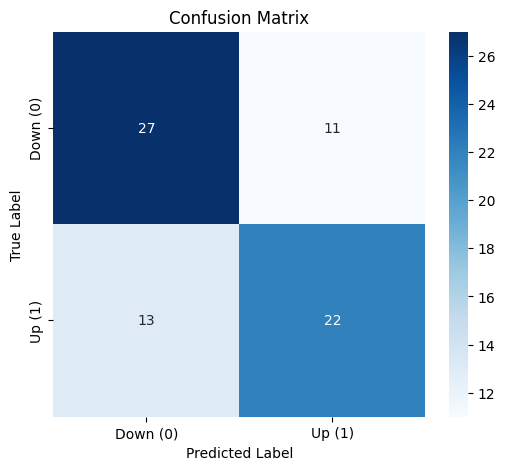

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down (0)", "Up (1)"], yticklabels=["Down (0)", "Up (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# N = 10 is the most optimal one